<a href="https://colab.research.google.com/github/2303A51058/ADM_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🎬 Introduction

This project focuses on analyzing the Cinemetrics dataset to uncover meaningful patterns in movie and TV show data. By applying data mining techniques, the goal is to understand how genres can be grouped, how they relate to ratings, and how recommendations can be improved.

The project utilizes clustering, visualization, and statistical analysis to reveal genre-based trends and viewer preferences. It also implements a basic recommendation system based on genre similarity and ratings.

##Data Source: Netflix Movies and TV Shows Dataset
The dataset used in this project is sourced from Kaggle: Netflix Movies and TV Shows. It provides comprehensive information on over 8,000 titles available on Netflix

## Import Python Modules

First, import the preliminary modules that will be used in this project:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

## Loading the Data

In [7]:
cenimetics = pd.read_csv('/content/Cinematrics.csv')

##Data Preprocessing
Simulate ratings, handle missing data, extract and one-hot encode genres, and concatenate to dataset.

In [8]:
# 3. Data Preprocessing
np.random.seed(42)
cenimetics['Rating(10)'] = np.round(np.random.uniform(4, 10, size=len(cenimetics)), 1)  # Simulated ratings
cenimetics.dropna(subset=['listed_in'], inplace=True)
cenimetics['Genre'] = cenimetics['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
# One-hot encode genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(cenimetics['Genre'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
cenimetics = pd.concat([cenimetics.reset_index(drop=True), genres_df], axis=1) # Changed df to cenimetics

##Clustering: K-Means and PCA for Visualization
Perform K-Means clustering on movie genres, apply PCA for 2D visualization, and plot the results.

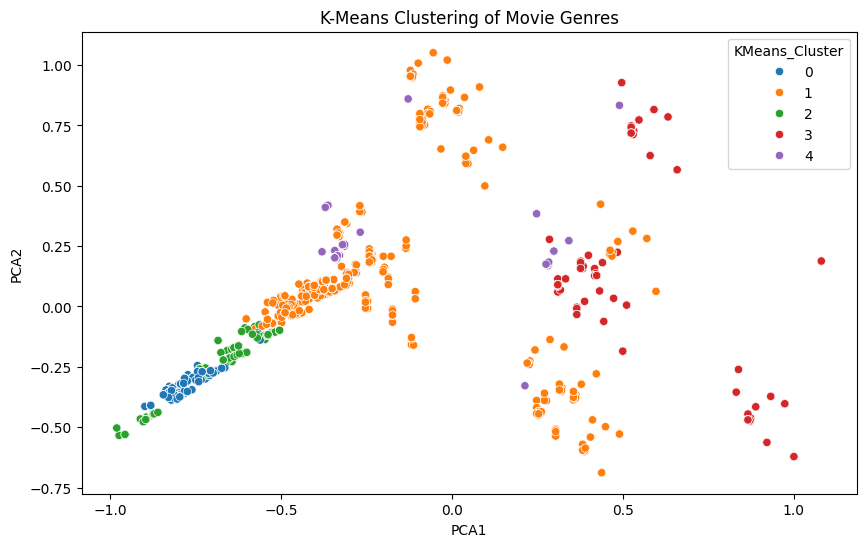

In [9]:
# 4. Clustering: K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
cenimetics['KMeans_Cluster'] = kmeans.fit_predict(genres_df) # Changed df to cenimetics
# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(genres_df)
cenimetics['PCA1'] = pca_result[:, 0] # Changed df to cenimetics
cenimetics['PCA2'] = pca_result[:, 1] # Changed df to cenimetics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cenimetics, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10') # Changed df to cenimetics
plt.title('K-Means Clustering of Movie Genres')
plt.show()

📊 Pie Chart of K-Means Clusters (Genre-Based Movie Groups)

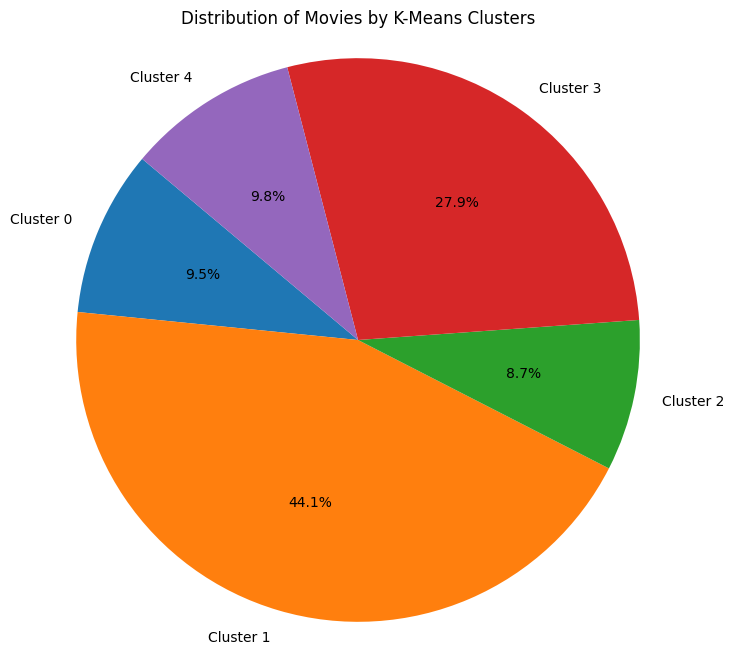

In [10]:
# Count the number of movies in each cluster
cluster_counts = cenimetics['KMeans_Cluster'].value_counts().sort_index()
# Plot a pie chart for cluster distribution
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Distribution of Movies by K-Means Clusters')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()

##Visualization: Rating Distribution
Visualize the distribution of simulated movie ratings with a histogram and KDE plot.

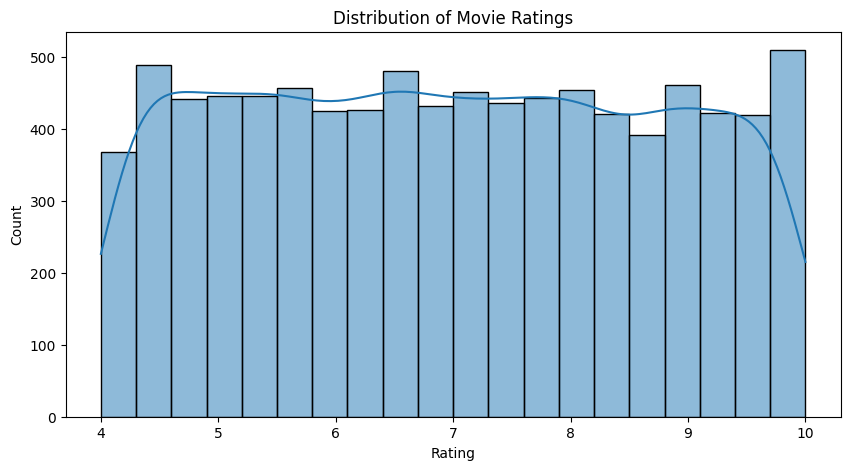

In [13]:
# 5. Visualization: Rating Distribution
plt.figure(figsize=(10, 5))
sns.histplot(cenimetics['Rating(10)'], bins=20, kde=True) # Changed df to cenimetics
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Yearly Rating Trend:
Average Movie Ratings Over the Years


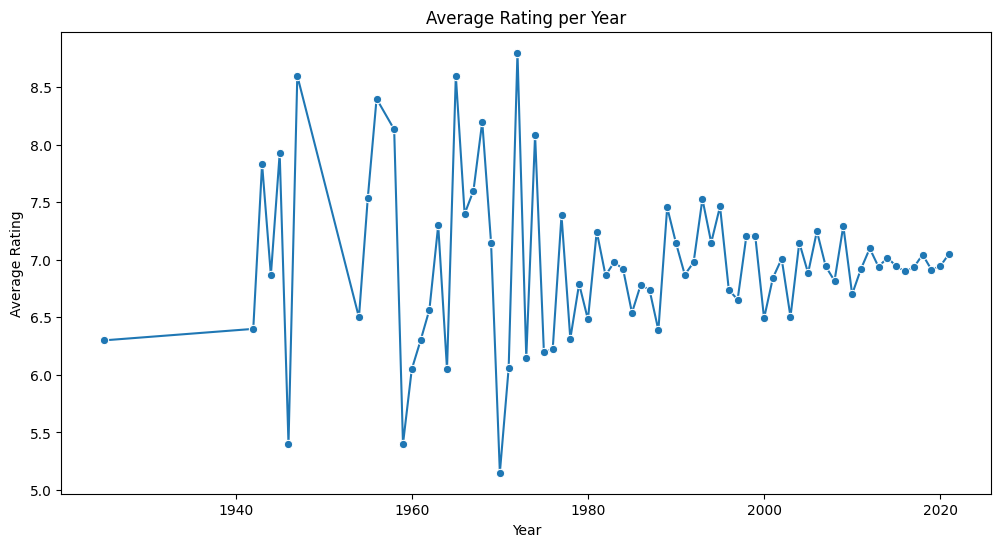

In [14]:
# Yearly Rating Trend (Average Rating per Year)
yearly_avg_rating = cenimetics.groupby('release_year')['Rating(10)'].mean() # Changed 'Release Year' to 'release_year'
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg_rating.index, y=yearly_avg_rating.values, marker='o')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

##Recommendation System: Movie Similarity and Suggestions
Explode genres, create a rating matrix, compute cosine similarity, and recommend top similar movies based on user input.

In [15]:
# 6. Recommendation System
# Explode the 'Genre' column to create individual rows for each genre
cenimetics_exploded = cenimetics.explode('Genre')
# Now create the pivot table using the exploded DataFrame
rating_matrix = cenimetics_exploded.pivot_table(index='title', columns='Genre', values='Rating(10)', aggfunc='mean').fillna(0)
movie_similarity = cosine_similarity(rating_matrix)
movie_similarity_df = pd.DataFrame(movie_similarity, index=rating_matrix.index, columns=rating_matrix.index)
def recommend_movies(movie_name, top_n=5):
    if movie_name not in movie_similarity_df:
        return ["Movie not found in dataset"]
    sim_scores = movie_similarity_df[movie_name].sort_values(ascending=False)[1:top_n+1]
    return sim_scores.index.tolist()
# Example usage
print("Recommended for 'Kota Factory':", recommend_movies('Kota Factory'))

Recommended for 'Kota Factory': ['Taj Mahal 1989', "You're My Destiny", 'Office Girls', 'Bangkok Bachelors', 'Love Around']


##Ranking and Sorting: Top Movies by Rating and Genre
Rank movies by overall ratings and within specific genres (e.g., Comedy), and display the top 10.

In [16]:
# 7. Ranking and Sorting
top10_overall = cenimetics.groupby('title')['Rating(10)'].mean().sort_values(ascending=False).head(10) # Changed df to cenimetics
print("Top 10 Movies by Rating:\n", top10_overall)
# Top 10 Movies per Genre (e.g., Comedy)
if 'Comedies' in cenimetics.columns: # Changed df to cenimetics
    top10_comedy = cenimetics[cenimetics['Comedies'] == 1].groupby('title')['Rating(10)'].mean().sort_values(ascending=False).head(10) # Changed df to cenimetics
    print("Top 10 Comedy Movies:\n", top10_comedy)

Top 10 Movies by Rating:
 title
Concrete Football          10.0
Zombie Dumb                10.0
Stardust                   10.0
Anjaan                     10.0
Running Out Of Time        10.0
Dinotrux Supercharged      10.0
SCAMS                      10.0
Scream                     10.0
Close                      10.0
What Happened to Monday    10.0
Name: Rating(10), dtype: float64
Top 10 Comedy Movies:
 title
Handsome Devil                                    10.0
Naomi and Ely's No Kiss List                      10.0
Hunt for the Wilderpeople                         10.0
Ghanchakkar                                       10.0
The Twins Effect II                               10.0
Spenser Confidential                              10.0
Love, Surreal and Odd                             10.0
Figaro Pho                                        10.0
Monster House                                     10.0
An American Girl: McKenna Shoots for the Stars    10.0
Name: Rating(10), dtype: float64


##Statistical Analysis: Boxplot of Movie Ratings
Visualize the distribution and spread of movie ratings using a boxplot.

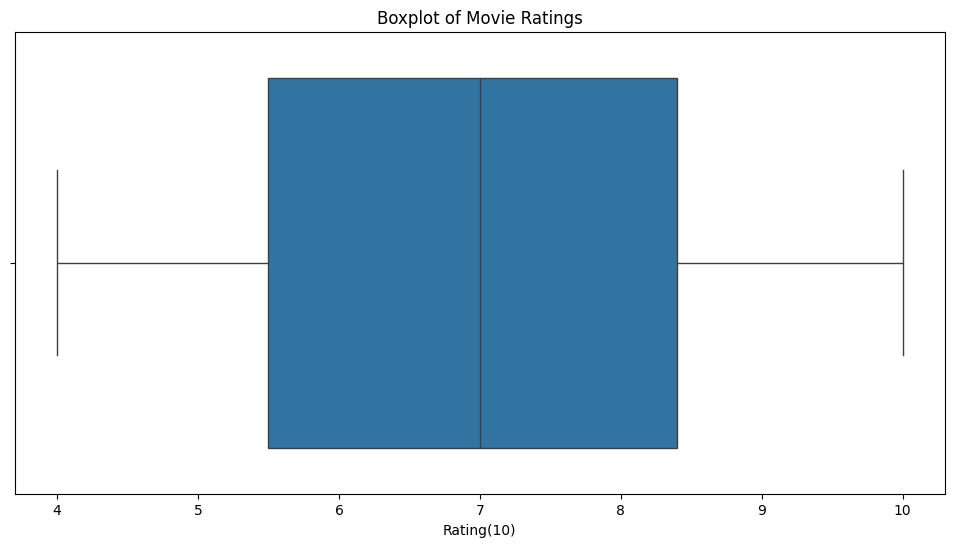

In [26]:
# 8. Statistical Analysis: Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cenimetics, x='Rating(10)') # Changed df to cenimetics
plt.title('Boxplot of Movie Ratings')
plt.show()

<ipython-input-28-5eac6818e0fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


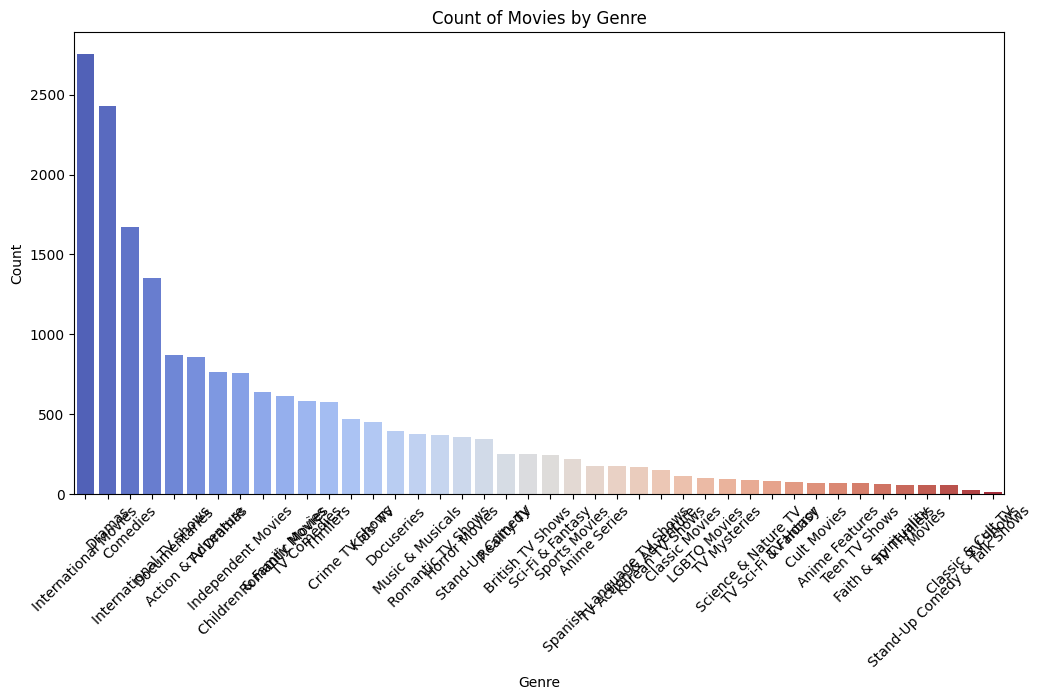

In [28]:
# Bar Plot: Count of Movies by Genre
plt.figure(figsize=(12, 6))
# Explode the 'Genre' column to count individual genres
genre_counts = cenimetics.explode('Genre')['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-84c9c94f0970>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.index, y=director_counts.values, palette='magma')


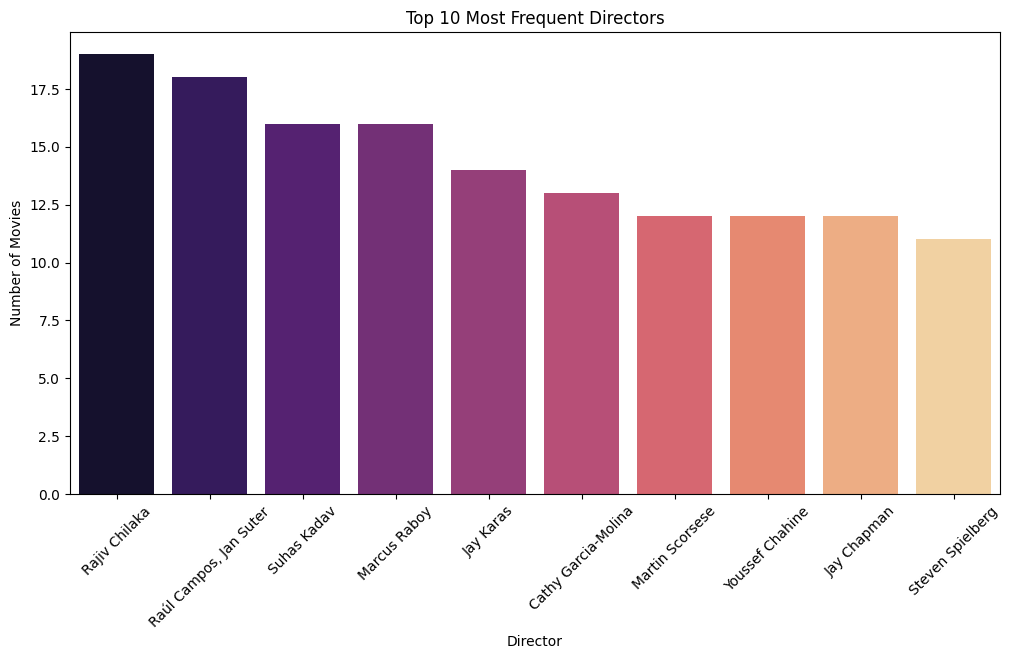

In [29]:
# Bar Plot: Top 10 Most Frequent Directors
plt.figure(figsize=(12, 6))
director_counts = cenimetics['director'].value_counts().head(10)
sns.barplot(x=director_counts.index, y=director_counts.values, palette='magma')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()